# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 15 september 2022

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [7]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [8]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [11]:
test_images_normalized = test_images.astype('float32')/255

In [12]:
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [13]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [18]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden ("Dense") laag toe

In [20]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

# ???

cnn.add(Flatten())
cnn.add(Dropout(0.5))

# ???

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [22]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [24]:
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 3,
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))

Epoch 1/3
469/469 [==============================] - 14s 29ms/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 2/3
469/469 [==============================] - 14s 31ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0558 - val_accuracy: 0.9823
Epoch 3/3
469/469 [==============================] - 14s 29ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0477 - val_accuracy: 0.9841


**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [25]:
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9841
0.9840999841690063


**OPDRACHT**: voeg labels aan deze grafiek toe

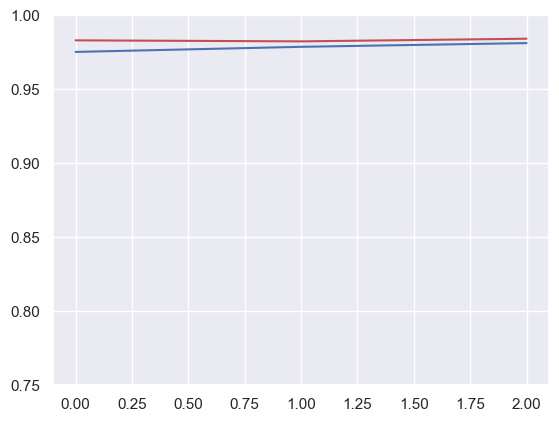

In [26]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
        0.9841
* is het netwerk onder- of over-trained?
        het netwerk is ondertrained
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
         de fouten komen doordat getallen al snel op andere getallen kunnen lijken
* wat is sneller: het trainen of het testen?
        trainen is sneller
* wat kun je nog doen om de nauwkeurigheid te verhogen?
        Door meer te experimenteren met andere lagen

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?


